In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
answers_num = {}
good_answers_num = {}
bad_answers_num = {}
for year in range(2007, 2023):
    data = pd.read_csv(f'status_{year}.csv', names=['date', 'user', 'task', 'lang',
                                                    'result', 'test', 'time', 'memory'])
    answers_num[year] = len(data.result)

    good_answers_num[year] = data.result.value_counts()['Accepted']
    bad_answers_num[year] = answers_num[year] - good_answers_num[year]

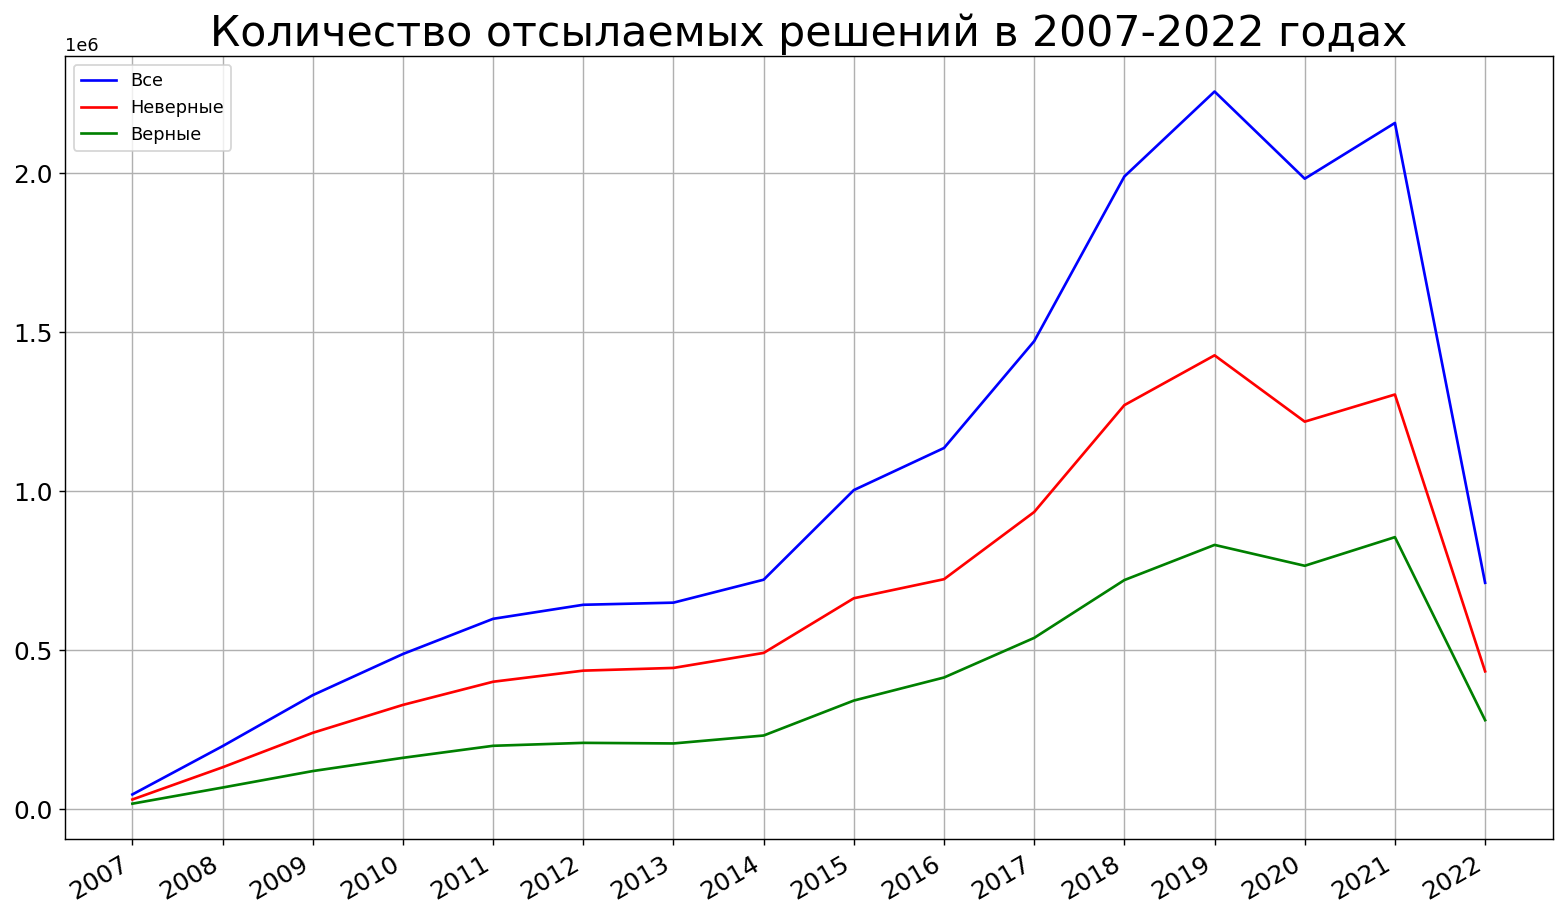

In [3]:
fig, ax = plt.subplots(figsize=(15, 9))
fig.dpi = 128

ax.plot(answers_num.keys(), answers_num.values(), label='Все', c='blue')
ax.plot(bad_answers_num.keys(), bad_answers_num.values(), label='Неверные', c='red')
ax.plot(good_answers_num.keys(), good_answers_num.values(), label='Верные', c='green')

leg = ax.legend(loc='upper left')

ax.set_xticks(range(2007, 2023))

plt.title('Количество отсылаемых решений в 2007-2022 годах', fontsize=24)
plt.tick_params(labelsize=14)

fig.autofmt_xdate()
ax.grid(True)

plt.show()

In [5]:
# Количество разных ошибок

errors = {name: {} for name in data.result.value_counts().index}
for year in range(2007, 2023):
    data = pd.read_csv(f'status_{year}.csv', names=['date', 'user', 'task', 'lang',
                                                    'result', 'test', 'time', 'memory'])
    for name in data.result.value_counts().index:
        try:
            errors[name][year] = data.result.value_counts()[name]
        except KeyError:
            pass

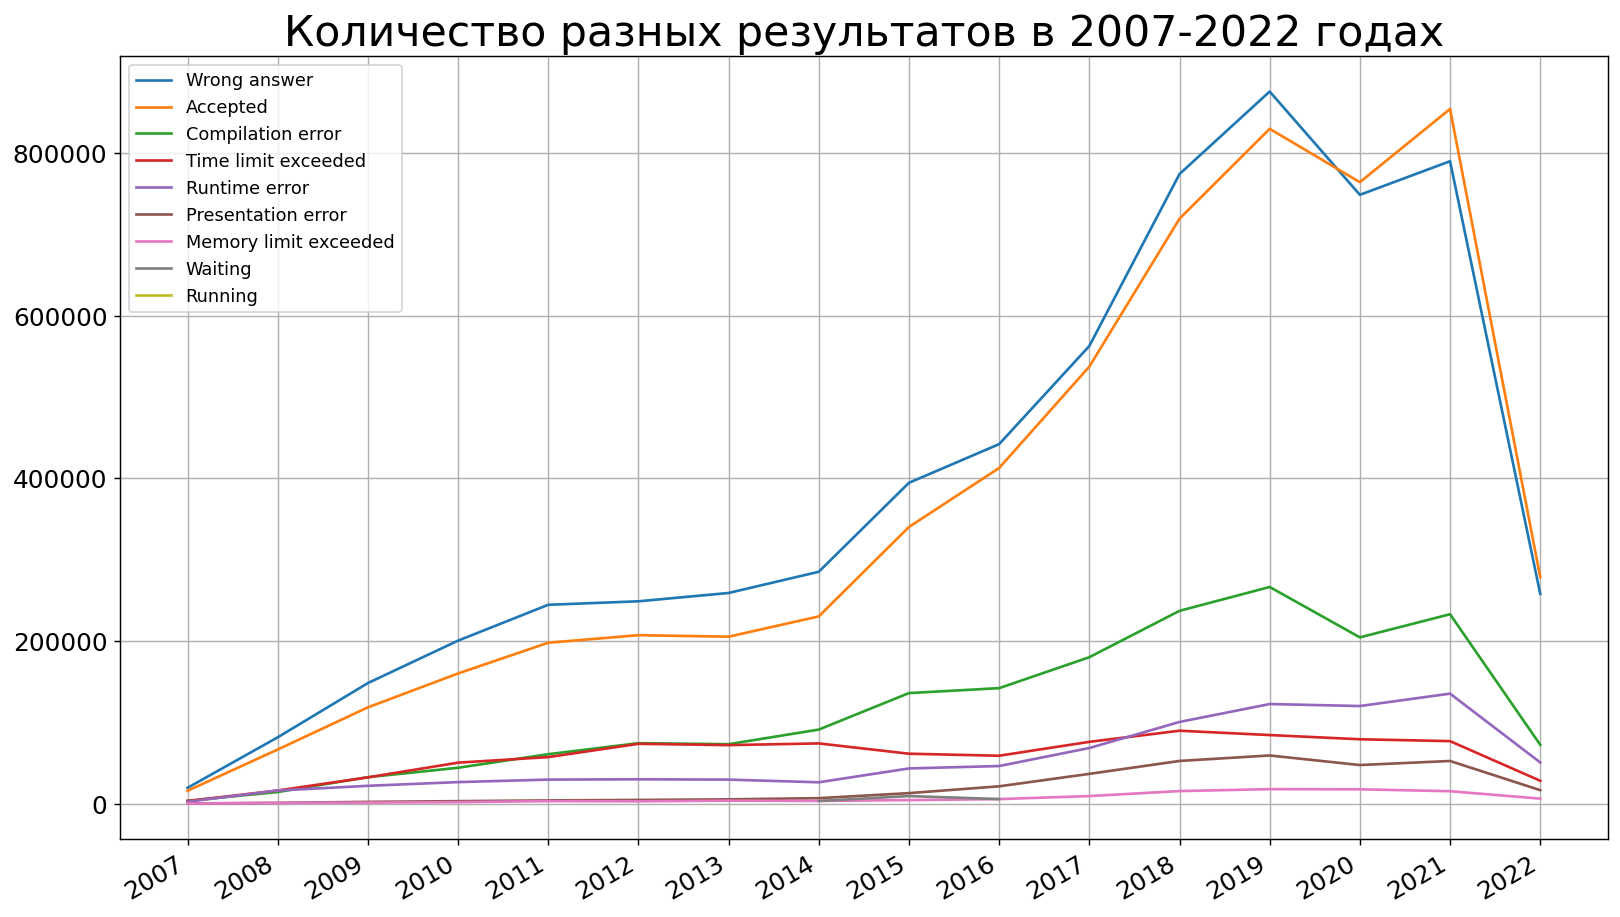

In [6]:
fig, ax = plt.subplots(figsize=(15, 9))
fig.dpi = 128

for name, year_count in errors.items():
    ax.plot(year_count.keys(), year_count.values(), label=name)

leg = ax.legend(loc='upper left')

ax.set_xticks(range(2007, 2023))

plt.title('Количество разных результатов в 2007-2022 годах', fontsize=24)
plt.tick_params(labelsize=14)

fig.autofmt_xdate()
ax.grid(True)

plt.show()